In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

np.random.seed(42)

# Dados

In [2]:
# Carregando os dados:
PATH = 'https://raw.githubusercontent.com/derSchmetterling/ML2022/main/'
df = pd.read_csv(PATH+'winequality-red.csv', header=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv(PATH+'winequality-white.csv', header=0, sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Cores dos gráficos para cada vinho:
c_tinto = '#990000'
c_branco = '#ffc34d'

In [5]:
# Tratamento log
df_trat = df.copy()

log_scale = ['residual sugar', 'chlorides', 'sulphates',
             'total sulfur dioxide', 'free sulfur dioxide',
             'volatile acidity', 'fixed acidity', 'density']

for l in log_scale:
  df_trat[l] = np.log(df_trat[l])
  df_trat.rename(columns={l: 'log '+l}, inplace=True)

# Tratamento Media 0 e Var 1
for c in df_trat.columns[:-1]:
  df_trat[c] = ( df_trat[c] - df_trat[c].mean() )/df_trat[c].std()

df_trat.head(3)

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,-0.485156,0.966521,-1.391037,-0.582968,-0.218695,-0.216312,-0.105418,0.558786,1.288240,-0.601874,-0.959946,5
1,-0.221161,1.613546,-1.391037,0.294535,0.558268,0.981690,0.856219,0.029199,-0.719708,0.266575,-0.584594,5
2,-0.221161,1.199040,-1.185699,-0.048463,0.365188,0.236276,0.550420,0.135159,-0.331073,0.064754,-0.584594,5


In [6]:
# Tratamento log
df_trat_white = df_white.copy()

for l in log_scale:
  df_trat_white[l] = np.log(df_trat_white[l])
  df_trat_white.rename(columns={l: 'log '+l}, inplace=True)

# Tratamento Media 0 e Var 1
for c in df_trat_white.columns[:-1]:
  df_trat_white[c] -= df_trat_white[c].mean()
  df_trat_white[c] /= df_trat_white[c].std()

df_trat_white.head(3)

,log fixed acidity,log volatile acidity,citric acid,log residual sugar,log chlorides,log free sulfur dioxide,log total sulfur dioxide,log density,pH,log sulphates,alcohol,quality
0,0.233483,0.083515,0.213258,1.680731,0.144667,0.679067,0.766246,2.327946,-1.246794,-0.265243,-1.393010,6
1,-0.633293,0.395086,0.047996,-1.096750,0.401763,-1.453422,0.013543,-0.007663,0.739953,0.115279,-0.824192,6
2,1.434211,0.191061,0.543783,0.488848,0.462756,-0.061466,-0.903074,0.360448,0.475053,-0.365662,-0.336633,6


In [7]:
# Retirando parte dos dados para comparação dos modelos:
from sklearn.model_selection import train_test_split

Y = df_trat['quality'].to_numpy()
X = df_trat.drop('quality', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=479,
                                   random_state=42, shuffle=False)

print(f'Shape X_treino: {X_train.shape}, \tShape Y_treino: {Y_train.shape}')
print(f'Shape X_teste: {X_test.shape}, \tShape Y_teste: {Y_test.shape}')

Shape X_treino: (1120, 11), 	Shape Y_treino: (1120,)
Shape X_teste: (479, 11), 	Shape Y_teste: (479,)


In [8]:
# Retirando parte dos dados para comparação dos modelos:
from sklearn.model_selection import train_test_split

Y = df_trat_white['quality'].to_numpy()
X = df_trat_white.drop('quality', axis=1)

X_train_w, X_test_w, Y_train_w, Y_test_w = train_test_split(X, Y, test_size=0.3,
                                           random_state=42, shuffle=False)

print(f'Shape X_treino: {X_train_w.shape}, \tShape Y_treino: {Y_train_w.shape}')
print(f'Shape X_teste: {X_test_w.shape}, \tShape Y_teste: {Y_test_w.shape}')

Shape X_treino: (3428, 11), 	Shape Y_treino: (3428,)
Shape X_teste: (1470, 11), 	Shape Y_teste: (1470,)


# Rede Neural para o Vinho Tinto

## Escolha dos melhores Parâmetros

In [ ]:
layer_1_nodes = [2,4,6,8]
layer_2_nodes = [0,5,10,15,20,25]

val_loss = np.zeros((len(layer_1_nodes),len(layer_2_nodes)))
opt = keras.optimizers.SGD(0.001)
model = keras.Sequential()

for i in range(0 , len(layer_1_nodes)):
  model.add(layers.Dense(layer_1_nodes[i],
                         activation=tf.nn.sigmoid,
                         input_shape=[11])
  )
  for j in range(0, len(layer_2_nodes)):
    if layer_2_nodes[j] != 0:
      model.add(layers.Dense(layer_2_nodes[j]))

    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer=opt, metrics=None)
    history = model.fit(X_train, Y_train, epochs=100,
                        verbose=0, validation_split=0.2)
    hist = pd.DataFrame(history.history)
    val_loss[i,j] = round(hist['val_loss'].min(), 4)
    print(f'Modelo {i},{j}.', end='   ')

print('\n')
val_loss = pd.DataFrame(val_loss, index=layer_1_nodes,
                        columns=layer_2_nodes)
val_loss

## Melhor Modelo

In [60]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
best = keras.Sequential([
             layers.Dense(2, activation=tf.nn.sigmoid, input_shape=[11]),
             layers.Dense(25), layers.Dense(1)
])
best.compile(loss='mse', optimizer=opt, metrics=None)

history = best.fit(X_train, Y_train, epochs=1000, verbose=0,
                   validation_split=0.2, callbacks=[early_stop])

hist = pd.DataFrame(history.history)
hist.tail()

,loss,val_loss
245,0.400450,0.438905
246,0.400425,0.439314
247,0.400447,0.439282
248,0.400307,0.439185
249,0.400374,0.439301


In [74]:
from sklearn.metrics import mean_squared_error

Y_predito = best.predict(X_test)
mse_tinto = mean_squared_error(Y_test,Y_predito)
print(mse_tinto)

0.4531202340066593


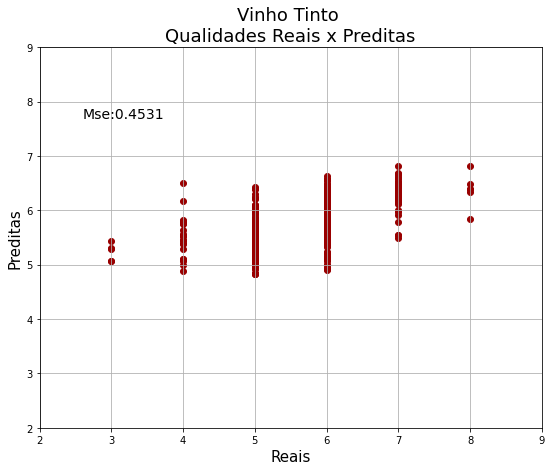

In [81]:
plt.figure(figsize=(9,7))

plt.scatter(Y_test, Y_predito, color=c_tinto)
plt.title('Vinho Tinto \nQualidades Reais x Preditas', fontsize=18)
plt.xlabel('Reais', fontsize=15)
plt.ylabel('Preditas', fontsize=15)
plt.xticks(np.arange(2,10))
plt.yticks(np.arange(2,10))
plt.annotate(f'Mse:{mse_tinto:.4f}', xy=(2.6,7.7), fontsize=14)
plt.grid(True)
plt.show()

# Rede Neural para o Vinho Branco

## Escolha dos melhores Parâmetros

In [ ]:
layer_1_nodes = [4,14,24,34,44]
layer_2_nodes = [0,4,14,24,34]

val_loss_w = np.zeros((len(layer_1_nodes),len(layer_2_nodes)))
opt = keras.optimizers.SGD(0.001)
model_w = keras.Sequential()

for i in range(0 , len(layer_1_nodes)):
  model_w.add(layers.Dense(layer_1_nodes[i],
                         activation=tf.nn.sigmoid,
                         input_shape=[11])
  )
  for j in range(0, len(layer_2_nodes)):
    if layer_2_nodes[j] != 0:
      model_w.add(layers.Dense(layer_2_nodes[j]))

    model_w.add(layers.Dense(1))
    model_w.compile(loss='mse', optimizer=opt, metrics=None)
    history_w = model_w.fit(X_train_w, Y_train_w, epochs=100,
                          verbose=0, validation_split=0.2)
    hist = pd.DataFrame(history_w.history)
    val_loss_w[i,j] = round(hist['val_loss'].min(), 4)
    print(f'Modelo {i},{j}.', end='   ')

print('\n')
val_loss_w = pd.DataFrame(val_loss_w, index=layer_1_nodes,
                          columns=layer_2_nodes)
val_loss_w

## Melhor Modelo

In [83]:
best_w = keras.Sequential([
               layers.Dense(10, activation=tf.nn.sigmoid, input_shape=[11]),
               #layers.Dense(25),
               layers.Dense(1)
])
best_w.compile(loss='mse', optimizer=opt, metrics=None)

history = best_w.fit(X_train_w, Y_train_w, epochs=1000, verbose=0,
                     validation_split=0.2, callbacks=[early_stop])

hist = pd.DataFrame(history.history)
hist.tail()

,loss,val_loss
233,0.572044,0.592733
234,0.572032,0.592134
235,0.571991,0.592060
236,0.571964,0.591878
237,0.571882,0.592480


In [84]:
from sklearn.metrics import mean_squared_error

Y_predito_w = best_w.predict(X_test_w)
mse_branco = mean_squared_error(Y_test_w, Y_predito_w)
print(mse_branco)

0.5139733193282886


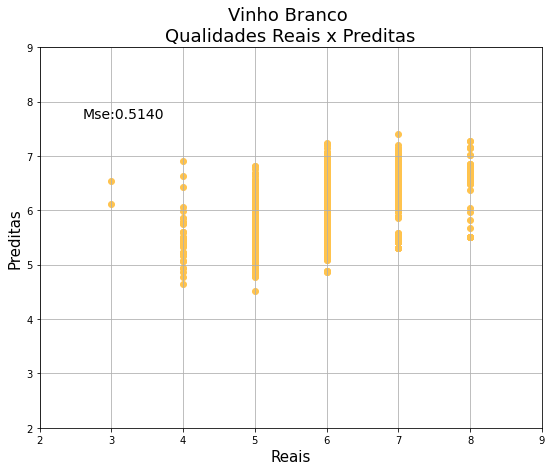

In [86]:
plt.figure(figsize=(9,7))

plt.scatter(Y_test_w, Y_predito_w, color=c_branco)
plt.title('Vinho Branco \nQualidades Reais x Preditas', fontsize=18)
plt.xlabel('Reais', fontsize=15)
plt.ylabel('Preditas', fontsize=15)
plt.xticks(np.arange(2,10))
plt.yticks(np.arange(2,10))
plt.annotate(f'Mse:{mse_branco:.4f}', xy=(2.6,7.7), fontsize=14)
plt.grid(True)
plt.show()